<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Copulas_3D_scatter_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code demosntrates the 3D scatter plot in Copulas Library by MIT Data to AI Lab.

---


Ref. https://sdv.dev/Copulas/tutorials/03_Multivariate_Distributions.html#Gaussian-Multivariate

In [ ]:
!pip install copulas

     |████████████████████████████████| 52 kB 1.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 11.2 MB 50.8 MB/s 
     |████████████████████████████████| 900 kB 22.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


This is a toy dataset with three columns following these distributions:

x: Beta distribution with a=0.1 and b=0.1

y: Beta distribution with a=0.1 and b=0.5

z: Normal distribution + 10 times y

In [ ]:

from copulas.datasets import sample_trivariate_xyz

data = sample_trivariate_xyz()

In [ ]:
data.head()

,x,y,z
0,9.004177e-05,2.883992e-06,0.638689
1,8.819273e-01,2.911979e-07,1.058121
2,5.003865e-01,4.886504e-04,0.372506
3,1.838544e-12,5.392802e-02,0.687370
4,1.627915e-01,1.634269e-08,-0.881068


<Axes3DSubplot:>

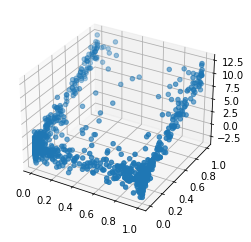

In [ ]:
from copulas.visualization import scatter_3d

scatter_3d(data)

In [ ]:
# fitting the dataset using Multivariate Gaussian
from copulas.multivariate import GaussianMultivariate

dist = GaussianMultivariate()
dist.fit(data)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:283: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  "minimize step, clipping to bounds", RuntimeWarning)


In [ ]:
# samples from the fitted model

sampled = dist.sample(1000)
sampled.head()

,x,y,z
0,1.000000,4.617713e-10,-1.903602
1,0.000261,2.329409e-03,1.662001
2,0.999994,2.793743e-03,-1.418936
3,0.000002,5.233547e-03,0.398680
4,0.000481,1.804961e-09,-0.393813


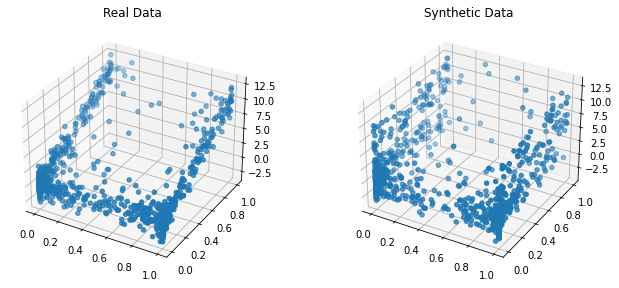

In [ ]:
from copulas.visualization import compare_3d

compare_3d(data, sampled)

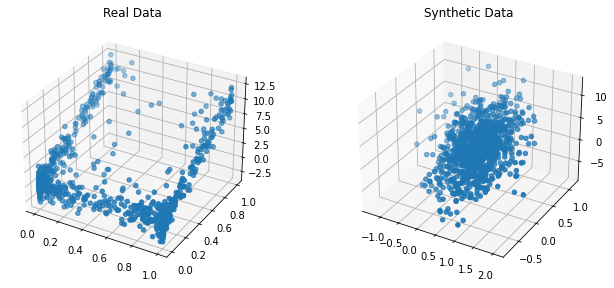

In [ ]:
# What if all three dimensions are normally distributed

from copulas.univariate import GaussianUnivariate

dist = GaussianMultivariate(distribution=GaussianUnivariate)
dist.fit(data)
sampled = dist.sample(1000)

compare_3d(data, sampled)

The above comparison shows that the samples (from univariate normal dist from each column) do not resemble the real data set.